**fuzzy c-means (FCM) :**




In [117]:
import pandas as pd

#read from csv and set row one for header
data_fram = pd.read_csv('credit_card.csv',header=1)

data_fram.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [118]:
data_fram.shape

(30000, 25)

In [119]:
list(data_fram.columns)
#see name of columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [120]:
list_of_columns = list(data_fram.columns)
# list of columns have word BILL
list_of_col_have_BILL = [item for item in list_of_columns if "BILL" in item]
print(list_of_col_have_BILL)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [121]:
data_fram['BILL_TOTAL'] = data_fram[list_of_col_have_BILL].sum(axis=1)
# sum list of columns that have word BILL and set in column BILL TOTAL
data_fram.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


In [122]:
new_data_fram = data_fram[["LIMIT_BAL","BILL_TOTAL"]]
new_data_fram.head()

,LIMIT_BAL,BILL_TOTAL
0,20000,7704
1,120000,17077
2,90000,101653
3,50000,231334
4,50000,109339


In [123]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(new_data_fram)
new_data_fram_norm = norm.transform(new_data_fram)

#Normalize the data frame with to attribute of LIMIT_BAL and Total BILL
new_data_fram_norm

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

In [124]:
new_data_fram_norm.shape

(30000, 2)

In [125]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


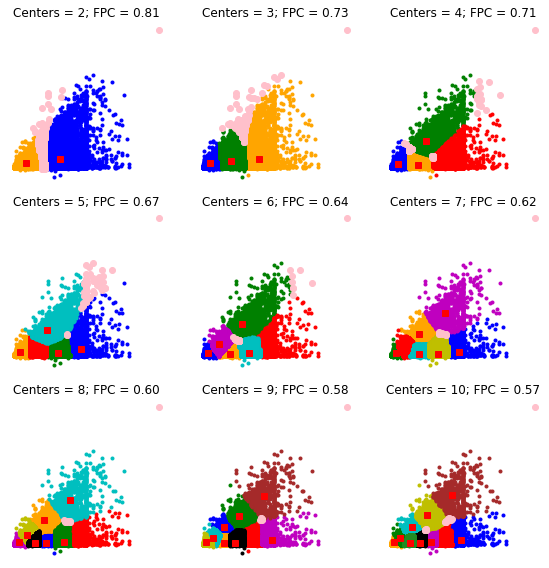

In [136]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import numpy as np
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []
x_new_data_fram_norm = np.array([item[0] for item in new_data_fram_norm])
y_new_data_fram_norm = np.array([item[1] for item in new_data_fram_norm])
for ncenters, ax in enumerate(axes1.reshape(-1), 2):

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
       new_data_fram_norm.T , ncenters, 2, error=0.005, maxiter=10000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    # use this threshold  to assign each pattern to their class if it is more than threshold
    threshold = (1 / ncenters) + 0.1
    # Plot assigned clusters, for each data point in data set
    cluster_membership = np.argmax(u, axis=0)
    # print(u.T[1])
    # print(cluster_membership.shape)
    # print("___________________________________________________")
    for j in range(ncenters):
        ax.plot(new_data_fram_norm[cluster_membership == j,0],
                new_data_fram_norm[cluster_membership == j,1], '.', color=colors[j])

    list_of_border_patterns = []
    index = 0
    # show pattern that we can't assign one class to each of them by color pink.
    for item in u.T:
        if max(item) < threshold:
            ax.plot(new_data_fram_norm[index][0],new_data_fram_norm[index][1],'o',color='pink')

        index += 1

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

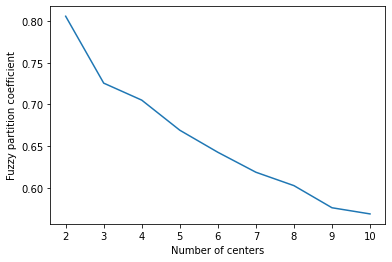

In [137]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [138]:

# learn best classifier we choose from max fpc -> number center = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
       new_data_fram_norm.T , 2, 2, error=0.005, maxiter=10000, init=None)

threshold = (1 / 2) + 0.1

list_of_class = []

# assign class of each pattern
for item in u.T:
        if max(item) > threshold:
          list_of_class.append([np.argmax(item)])
        else:
            index = 0
            list_of_class.append([0,1])




In [139]:
# add it to data frame
data_fram['class_assigend'] = list_of_class

In [140]:
data_fram[['default payment next month','class_assigend']].head(300)

,default payment next month,class_assigend
0,1,[1]
1,1,[1]
2,0,[1]
3,0,[1]
4,0,[1]
...,...,...
295,0,"[0, 1]"
296,0,[1]
297,0,"[0, 1]"
298,0,[0]


In [141]:
for_expriment = data_fram[['default payment next month','class_assigend']]
arr = for_expriment.to_numpy()
arr

array([[1, list([1])],
       [1, list([1])],
       [0, list([1])],
       ...,
       [1, list([1])],
       [1, list([1])],
       [1, list([1])]], dtype=object)

In [142]:
# see relation between default payment next month and or fazzy class that calculate from TOTAL_BIL and LIMIT_BAL
number_of_simmilar_item = 0
for item in arr :
  if len(item[1]) == 1 and item[1][0] == item[0]:
      number_of_simmilar_item +=1

print(number_of_simmilar_item)
print(number_of_simmilar_item/len(arr))

12244
0.40813333333333335


In [143]:
number_of_simmilar_item = 0
for item in arr :
  if len(item[1]) == 1 and item[1][0] == item[0]:
      number_of_simmilar_item +=1
  elif len(item[1]) == 2:
      number_of_simmilar_item +=1
      
print(number_of_simmilar_item)
print(number_of_simmilar_item/len(arr))

15135
0.5045
